# The Normal Equation

*The Normal Equation :*  
$\hat{\theta} = {\left( X^{T} \cdot X \right)}^{-1} \cdot {X}^{T} \cdot y$  
is the value that minimizes the cost function where $y$ is the vector of target values.

In [1]:
import numpy as np

X = 2*np.random.rand(100, 1)
y = 4 + 3*X + np.random.randn(100, 1)

In [3]:
import matplotlib.pyplot as plt

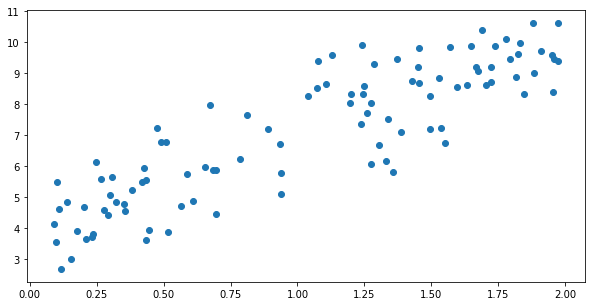

In [7]:
plt.figure(figsize = (10, 5))
plt.scatter(X, y)
plt.show()

Computing $\hat{\theta}$ using the normal equation

In [12]:
X_b = np.c_[np.ones((100, 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [13]:
theta_best

array([[3.92982275],
       [3.07276568]])

In [15]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]

In [17]:
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 3.92982275],
       [10.07535411]])

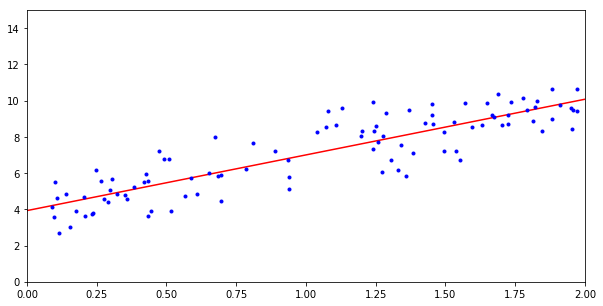

In [21]:
plt.figure(figsize = (10, 5))
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [22]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([3.92982275]), array([[3.07276568]]))

In [23]:
lin_reg.predict(X_new)

array([[ 3.92982275],
       [10.07535411]])

# Gradient Descent

When using Gradient Descent, make sure all features have a similar scale.

*Gradient descent step*  
$\theta^{next step} = \theta - \eta\nabla_{\theta}MSE(\theta)$

In [27]:
# Batch Gradient Descent

eta = 0.1
n_iterations = 1000
m = 100

theta = np.random.randn(2, 1) # random initialization

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [28]:
theta

array([[3.92982275],
       [3.07276568]])

In [30]:
# Stochastic Gradient Descent

n_epochs = 50
t0, t1 = 5, 50

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2, 1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2*xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch*m + 1)
        theta = theta - eta*gradients

In [31]:
theta

array([[3.93611323],
       [3.09391036]])